<a href="https://colab.research.google.com/github/PuliNitishKumar/Data_Science_Projects/blob/main/Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

**Reading the Dataset**

In [ ]:
df = pd.read_csv('/content/creditcard_2023.csv')
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135828,135828,0.041000,-0.108000,1.368288,-0.700171,0.338186,0.128676,0.731132,-0.169221,0.235127,...,-0.204929,-0.600566,-0.102806,-0.180896,-0.250073,0.239044,0.083323,0.184187,576.20,0.0
135829,135829,-0.016072,-0.836614,2.038343,-1.845267,-0.385382,0.262377,0.398194,-0.163243,-0.383754,...,-0.022070,0.690636,0.359385,1.504265,-0.668031,-0.672891,-0.082934,0.330087,14131.06,0.0
135830,135830,-0.206431,-0.194331,1.130269,-0.719210,0.517368,1.439973,0.362887,0.144936,0.290436,...,-0.101876,0.132729,-0.039960,-2.121333,-0.594084,0.819063,0.070796,0.062354,14629.90,0.0
135831,135831,0.730300,-0.855166,0.711886,-0.613005,-0.024469,0.838489,0.263004,-0.095255,1.245111,...,-0.161274,-0.621391,-0.269526,-1.275957,0.199488,1.945247,-0.327195,-0.037412,5837.61,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135833 entries, 0 to 135832
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      135833 non-null  int64  
 1   V1      135833 non-null  float64
 2   V2      135833 non-null  float64
 3   V3      135833 non-null  float64
 4   V4      135833 non-null  float64
 5   V5      135833 non-null  float64
 6   V6      135833 non-null  float64
 7   V7      135832 non-null  float64
 8   V8      135832 non-null  float64
 9   V9      135832 non-null  float64
 10  V10     135832 non-null  float64
 11  V11     135832 non-null  float64
 12  V12     135832 non-null  float64
 13  V13     135832 non-null  float64
 14  V14     135832 non-null  float64
 15  V15     135832 non-null  float64
 16  V16     135832 non-null  float64
 17  V17     135832 non-null  float64
 18  V18     135832 non-null  float64
 19  V19     135832 non-null  float64
 20  V20     135832 non-null  float64
 21  V21     13

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,135833.000000,135833.000000,135833.000000,135833.000000,135833.000000,135833.000000,135833.000000,135832.000000,135832.000000,135832.000000,...,135832.000000,135832.000000,135832.000000,135832.000000,135832.000000,135832.000000,135832.000000,135832.000000,135832.000000,135832.000000
mean,67916.000000,0.317128,-0.485584,1.000701,-0.658270,0.219183,0.480927,0.442197,-0.129299,0.528721,...,-0.124391,-0.127739,-0.045826,0.150129,0.145667,-0.020449,-0.214013,-0.096106,12027.788384,0.001936
std,39211.753895,0.629591,0.683112,0.659933,0.637591,0.610285,0.700142,0.505043,0.246553,0.732307,...,0.284043,0.573508,0.599514,1.109354,0.713235,1.082146,0.463741,0.748110,6928.274419,0.043960
min,0.000000,-3.495584,-49.966572,-2.631176,-4.795050,-5.182978,-21.111108,-3.470512,-10.756342,-2.740952,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-7.958110,-10.498633,-29.510941,50.120000,0.000000
25%,33958.000000,-0.167395,-0.648776,0.560956,-1.003861,-0.052504,0.081597,0.246542,-0.181987,0.107483,...,-0.194885,-0.526578,-0.196193,-0.549498,-0.302772,-0.779704,-0.305740,-0.110140,6034.507500,0.000000
50%,67916.000000,0.088321,-0.411328,0.908096,-0.549493,0.137046,0.373937,0.410787,-0.134351,0.405541,...,-0.126898,-0.128293,-0.069575,0.169633,0.190912,-0.139666,-0.224429,-0.043119,11995.690000,0.000000
75%,101874.000000,0.957525,-0.198283,1.371309,-0.218194,0.350100,0.733424,0.584495,-0.066459,0.813675,...,-0.057668,0.241319,0.060505,0.866274,0.613245,0.641401,-0.137228,0.086003,18026.287500,0.000000
max,135832.000000,1.695400,3.781692,14.125834,3.175853,42.716891,9.704313,41.568286,5.958040,20.270062,...,8.087080,12.632511,26.190808,11.035900,10.458350,5.623285,30.339264,77.255937,24039.930000,1.000000


**Checking for null values**

In [ ]:
df.isnull().sum().sum()

24

**Removing the row that consists of null values**

In [ ]:
df.drop(135832,inplace = True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
counts = df['Class'].value_counts()
counts

,count
Class,
0.0,135569
1.0,263


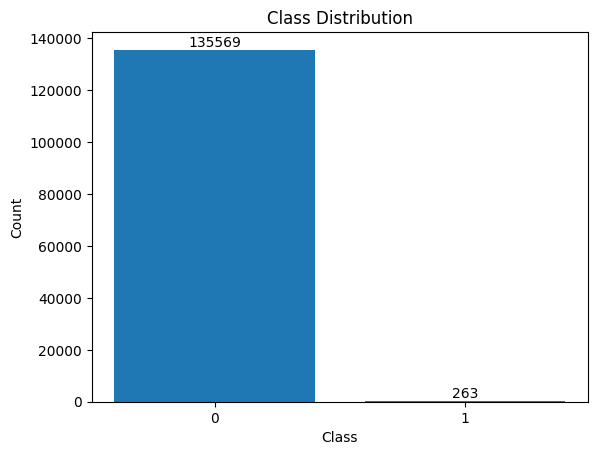

In [ ]:
plt.bar(counts.index,counts.values)
for i, value in enumerate(counts.values):
  plt.text(counts.index[i], value + 0.1, str(value), ha='center', va='bottom')
  plt.xticks(counts.index)
  plt.xlabel('Class')
  plt.ylabel('Count')
  plt.title('Class Distribution')


 **Preprocessing and Splitting the data**

In [ ]:
X = df.iloc[:, [1,29]].values
y = df.iloc[:, 30].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

**Logistic Regression**

Accuracy for Logistic Regression:  0.9981153189233759

Confusion Matrix for Logistic Regression 



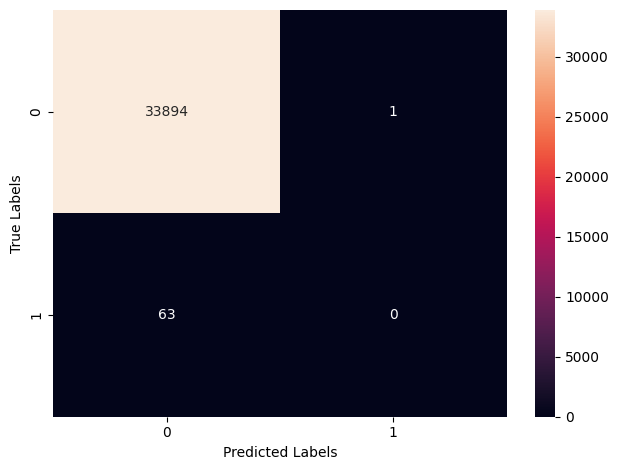

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
acc_lr = clf_lr.score(X_test, y_test)
print('Accuracy for Logistic Regression: ', acc_lr)
print('\nConfusion Matrix for Logistic Regression \n')
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr,annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

**KNN**

Accuracy for KNN:  0.9981447670651982

Confusion Matrix for KNN 



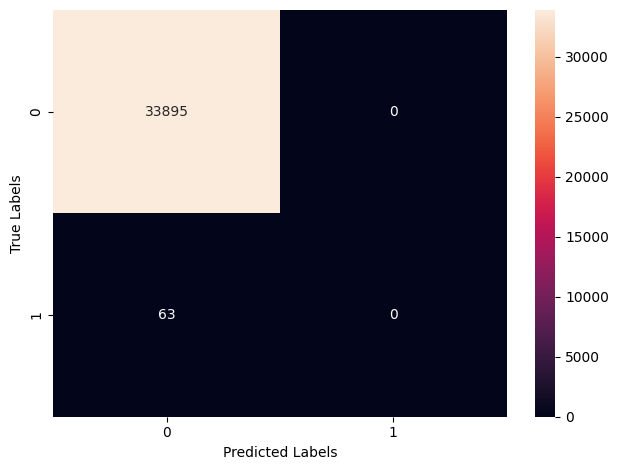

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = clf_knn.score(X_test, y_test)
print('Accuracy for KNN: ', acc_knn)
print('\nConfusion Matrix for KNN \n')
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn,annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

**Random Forest Classifier**

Accuracy for Random Forest Classifier:  0.9981153189233759

Confusion Matrix for Random Forest Classifier 



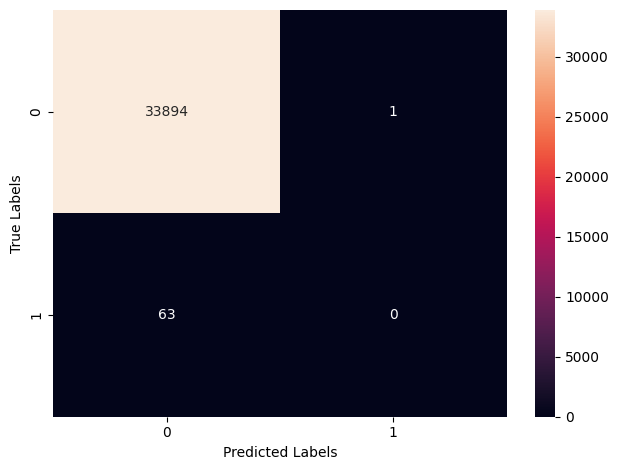

In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = clf_rf.score(X_test, y_test)
print('Accuracy for Random Forest Classifier: ', acc_rf)
print('\nConfusion Matrix for Random Forest Classifier \n')
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf,annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

**Final Accuracies**

In [ ]:
print('Logistic Regression: {:.4f}%'.format(acc_lr * 100) )
print('KNN: {:.4f}%'.format(acc_knn * 100))
print('Random Forest Classifier: {:.4f}%'.format(acc_rf * 100))

Logistic Regression: 99.8115%
KNN: 99.8145%
Random Forest Classifier: 99.8115%
